In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Importing Dataset

In [93]:
data = pd.read_csv("weatherHistory.csv")

In [94]:
data.shape

(96453, 12)

In [95]:
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [96]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# missing values

In [98]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Correlation Analysis

Text(0.5, 1.0, 'Correlation of Features')

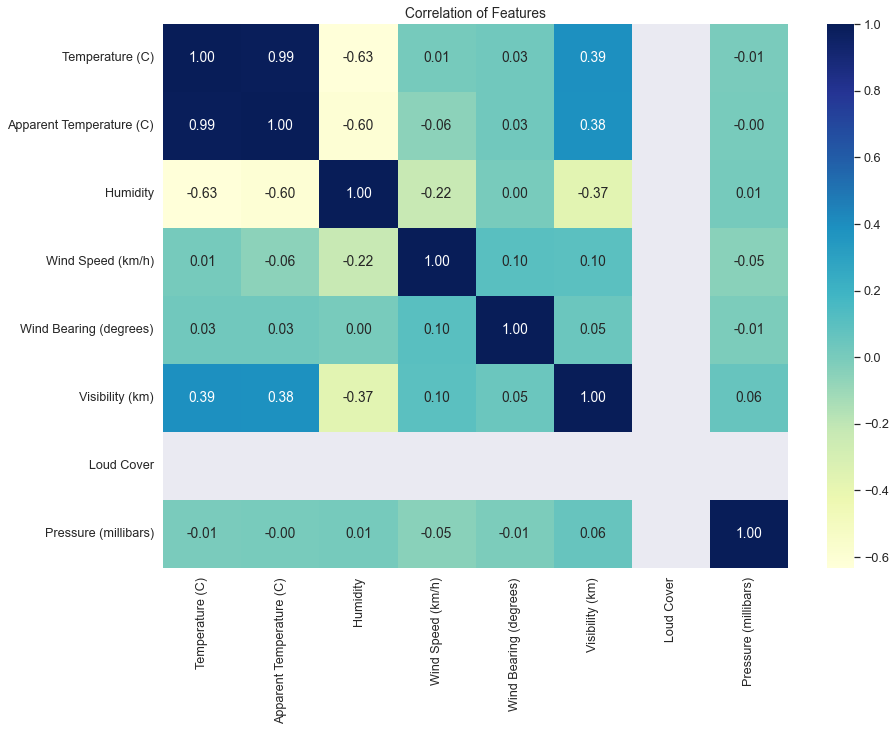

In [99]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), fmt= '.2f', annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features')

In [100]:
data.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

In [101]:
data["Loud Cover"].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

# Finding Categorical Features


In [102]:
categorical_features=[]
for feature in data.columns:
    if data[feature].dtype=="object":
        categorical_features.append(feature)

In [103]:
categorical_features

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

# Finding year from Formatted Date Column

In [104]:
def year(a):
    return a[0:4]

In [105]:
data["Year"] = data["Formatted Date"].apply(lambda x: year(x))

# Value counts of categorical features

In [106]:
data["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [107]:
data["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [108]:
data["Daily Summary"].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

### Filling missing values in Percip Type by mode value

In [109]:
data["Precip Type"]=data["Precip Type"].fillna(data["Precip Type"].mode().iloc[0])

In [110]:
data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Year                        0
dtype: int64

Now no missing value in the dataframe

# One Hot Encoding

In [111]:
onehot =  OneHotEncoder(sparse=False,handle_unknown='ignore')
onehot.fit(data[["Summary", "Precip Type"]])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [112]:
encoded_cols = list(onehot.get_feature_names(["Summary", "Precip Type"]))
print(encoded_cols)

['Summary_Breezy', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy', 'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy', 'Summary_Dry and Partly Cloudy', 'Summary_Foggy', 'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast', 'Summary_Humid and Partly Cloudy', 'Summary_Light Rain', 'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy', 'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry', 'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy', 'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy', 'Precip Type_rain', 'Precip Type_snow']


# Adding encoded cols to main dataframe

In [113]:
data[encoded_cols] = onehot.transform(data[["Summary", "Precip Type"]])

In [114]:
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  ...  \
0                   251.0          15.8263         0.0  ...   
1                   259.0          15.8263         0.0  ...   
2                   204.0          14.9569         0.0  ...   
3                   269.0          15.8263         0.0  ...   
4                   259.0          15.8263         0.0  ...   

   Summary_Partly Cloudy Summary_Rain Summary_Windy  Summary_Windy and Dry  \
0                    1.0          0.0           0.0                    0.0   
1                    1.0          0.0           0.0                    0.0   
2                    0.0          0.0           0.0                    0.0   
3                    1.0          0.0           0.0                    0.0   
4                    0.0          0.0           0.0                    0.0   

   Summary_Windy and Foggy  Summary_Windy and Mostly Cloudy  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      0.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              0.0   

   Summary_Windy and Overcast  Summary_Windy and Partly Cloudy  \
0                         0.0                              0.0   
1                         0.0                              0.0   
2                         0.0                              0.0   
3                         0.0                              0.0   
4                         0.0                              0.0   

   Precip Type_rain  Precip Type_snow  
0               1.0               0.0  
1               1.0               0.0  
2               1.0               0.0  
3               1.0               0.0  
4               1.0               0.0  

[5 rows x 42 columns]

In [115]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Year', 'Summary_Breezy',
       'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Clou

# Dropping Unnecessary columns 

In [116]:
data.drop(["Formatted Date", "Summary", "Daily Summary","Precip Type", "Loud Cover"], axis=1, inplace=True)

In [117]:
data["Year"].dtype

dtype('O')

# Converting year datatype from object to int64

In [118]:
data["Year"] = data["Year"].astype("int64")

In [119]:
data['Year'].value_counts()

2010    8784
2008    8784
2012    8784
2016    8784
2006    8760
2007    8760
2009    8760
2011    8760
2013    8760
2015    8760
2014    8757
Name: Year, dtype: int64

# Train Test Split

In [120]:
train = data[data["Year"] < 2016]
test = data[data["Year"] == 2016]

# Dropping Year Column

In [121]:
train.drop(["Year"],axis=1,inplace=True)
test.drop(["Year"],axis=1,inplace=True)



c:\users\palsh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [122]:
train.shape

(87669, 36)

In [123]:
test.shape

(8784, 36)

In [124]:
X_train = train.drop(["Apparent Temperature (C)"], axis=1)
y_train = train["Apparent Temperature (C)"]

In [125]:
X_test = test.drop(["Apparent Temperature (C)"], axis=1)
y_test = test["Apparent Temperature (C)"]

In [126]:
X_train

Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0             9.472222      0.89            14.1197                   251.0   
1             9.355556      0.86            14.2646                   259.0   
2             9.377778      0.89             3.9284                   204.0   
3             8.288889      0.83            14.1036                   269.0   
4             8.755556      0.83            11.0446                   259.0   
...                ...       ...                ...                     ...   
87664        16.011111      0.46             0.1288                   340.0   
87665        13.061111      0.55             6.9552                   331.0   
87666        11.161111      0.67             7.9212                   352.0   
87667        10.583333      0.69             6.4239                   342.0   
87668        10.850000      0.70             3.6708                    10.0   

       Visibility (km)  Pressure (millibars)  Summary_Breezy  \
0              15.8263               1015.13             0.0   
1              15.8263               1015.63             0.0   
2              14.9569               1015.94             0.0   
3              15.8263               1016.41             0.0   
4              15.8263               1016.51             0.0   
...                ...                   ...             ...   
87664          16.1000               1019.23             0.0   
87665          15.5526               1019.81             0.0   
87666          16.1000               1020.33             0.0   
87667          16.1000               1019.75             0.0   
87668          15.5526               1019.55             0.0   

       Summary_Breezy and Dry  Summary_Breezy and Foggy  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
87664                     0.0                       0.0   
87665                     0.0                       0.0   
87666                     0.0                       0.0   
87667                     0.0                       0.0   
87668                     0.0                       0.0   

       Summary_Breezy and Mostly Cloudy  ...  Summary_Partly Cloudy  \
0                                   0.0  ...                    1.0   
1                                   0.0  ...                    1.0   
2                                   0.0  ...                    0.0   
3                                   0.0  ...                    1.0   
4                                   0.0  ...                    0.0   
...                                 ...  ...                    ...   
87664                               0.0  ...                    1.0   
87665                               0.0  ...                    1.0   
87666                               0.0  ...                    1.0   
87667                               0.0  ...                    0.0   
87668                               0.0  ...                    1.0   

       Summary_Rain  Summary_Windy  Summary_Windy and Dry  \
0               0.0            0.0                    0.0   
1               0.0            0.0                    0.0   
2               0.0            0.0                    0.0   
3               0.0            0.0                    0.0   
4               0.0            0.0                    0.0   
...             ...            ...                    ...   
87664           0.0            0.0                    0.0   
87665           0.0            0.0                    0.0   
87666           0.0            0.0                    0.0   
87667           0.0            0.0                    0.0   
87668           0.0            0.0                    0.

# Applying pseudo inverse 

In [127]:
weights=np.dot(np.linalg.pinv(X_train),y_train)

In [128]:
weights.shape

(35,)

In [129]:
type(weights)

numpy.ndarray

In [130]:
X_test.T.shape

(35, 8784)

# Prediction

In [131]:
y_pred = np.dot(X_test,weights.T)

In [132]:
y_pred

array([10.37215433, 10.68313062, 10.10349976, ..., 22.11513415,
       21.40125696, 20.70752092])

# RMSE calculation

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.988644824466525


# r2_score calculation

In [134]:
r2_score(y_test, y_pred)

0.9906637497053463

# Visualization

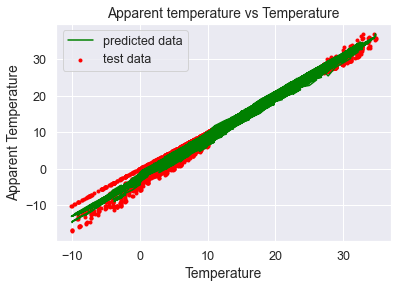

In [145]:
plt.scatter(X_test.loc[:,'Temperature (C)'], y_test, color = "red",marker='.',linewidths=1,label="test data")
plt.plot(X_test.loc[:,'Temperature (C)'], y_pred, color = "green",label="predicted data")
plt.title("Apparent temperature vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Apparent Temperature")
plt.legend()
plt.show()